In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('total.csv', names=['Date', 'Event', 'Country', 'User', 'Source', 'Topic', 'Price'])

In [3]:
#report = pdp.ProfileReport(df, title='Pandas Profiling Report')

In [4]:
df.head()

,Date,Event,Country,User,Source,Topic,Price
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,0
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,0
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,0
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,0
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,0


In [5]:
df.shape

(597852, 7)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %H:%M:%S")

In [7]:
df.Date.dt.month.unique()

array([1, 2, 3])

In [8]:
df.Source.value_counts()

return     371854
Reddit     105216
AdWords     63065
SEO         41742
Name: Source, dtype: int64

In [9]:
first = df[(df.Source != 'return') & (df.Event == 'read')]

In [10]:
first

,Date,Event,Country,User,Source,Topic,Price
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America,0
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America,0
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa,0
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe,0
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America,0
...,...,...,...,...,...,...,...
210018,2018-03-30 23:57:06,read,country_1,2458361279,SEO,North America,0
210019,2018-03-30 23:58:54,read,country_6,2458361280,AdWords,Asia,0
210020,2018-03-30 23:59:13,read,country_8,2458361281,AdWords,Europe,0
210021,2018-03-30 23:59:40,read,country_5,2458361282,AdWords,Europe,0


1. Total first visitor per topic

In [11]:
f_topic = first.Topic.value_counts()
f_topic

Asia             76092
Europe           39561
North America    37567
South America    25095
Africa           15913
Australia        15795
Name: Topic, dtype: int64

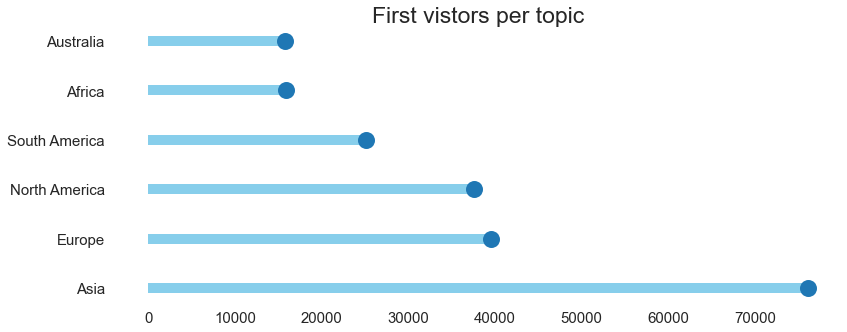

In [12]:
ax = plt.figure(figsize=(13,5))
plt.hlines(y=f_topic.index, xmin=0, xmax=f_topic.values, color='skyblue', linewidth=10)
plt.plot(f_topic.values, f_topic.index, "o", markersize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('First vistors per topic', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

2. Total first visitor per source

In [13]:
f_source = first.Source.value_counts()
f_source

Reddit     105216
AdWords     63065
SEO         41742
Name: Source, dtype: int64

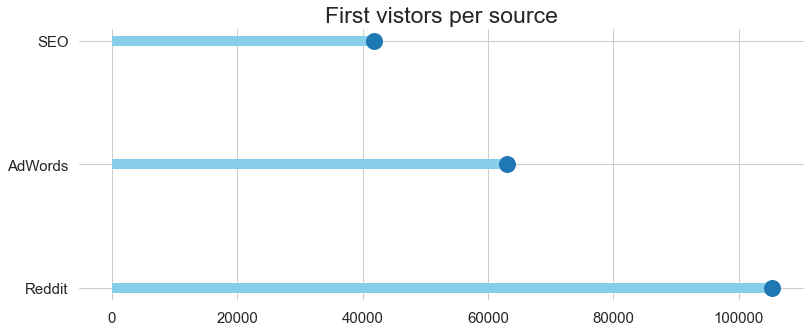

In [14]:
ax = plt.figure(figsize=(13,5))
plt.hlines(y=f_source.index, xmin=0, xmax=f_source.values, color='skyblue', linewidth=10)
plt.plot(f_source.values, f_source.index, "o", markersize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('First vistors per source', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

3. Total first visitor per country

In [15]:
f_country = first.Country.value_counts()
f_country

country_7    51791
country_2    50675
country_5    40349
country_6    31156
country_8    15483
country_4    12751
country_1     5076
country_3     2742
Name: Country, dtype: int64

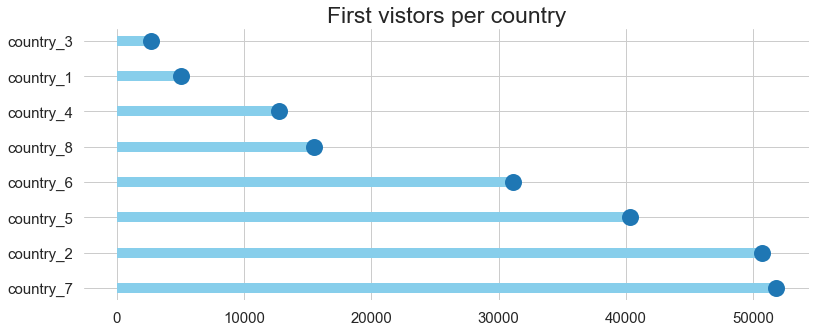

In [16]:
ax = plt.figure(figsize=(13,5))
plt.hlines(y=f_country.index, xmin=0, xmax=f_country.values, color='skyblue', linewidth=10)
plt.plot(f_country.values, f_country.index, "o", markersize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('First vistors per country', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

4. Total first visitor per day, per hour

In [17]:
first.loc[:, 'Month'] = first['Date'].dt.month

/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


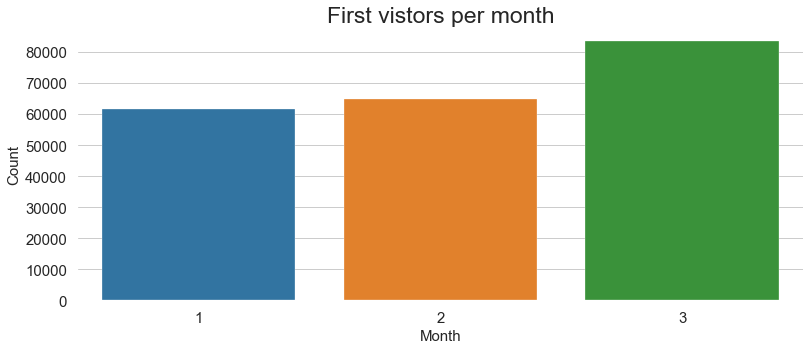

In [18]:
ax = plt.figure(figsize=(13,5))
sns.countplot(data=first, x='Month')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('First vistors per month', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

In [19]:
first.loc[:, 'Hour'] = first['Date'].dt.hour

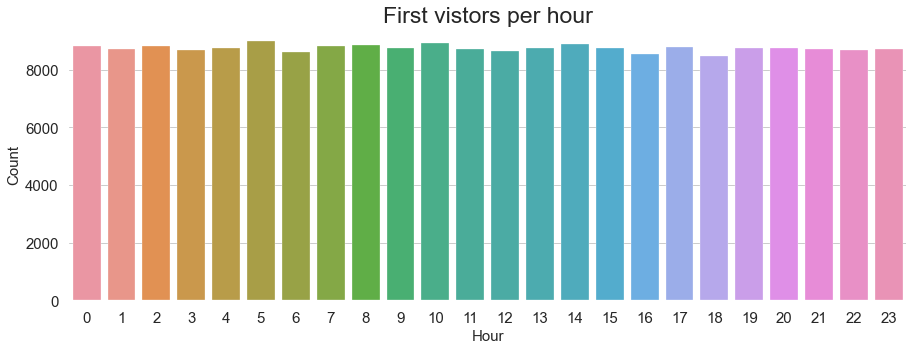

In [20]:
ax = plt.figure(figsize=(15,5))
sns.countplot(data=first, x='Hour')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('First vistors per hour', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

5. Relationship between topic and source

In [21]:
topic_source_pivot = first.groupby(['Source', 'Topic'])\
                    .User.count()\
                    .reset_index()\
                    .pivot(index='Source', columns='Topic')
topic_source_pivot

User                                                    
Topic   Africa   Asia Australia Europe North America South America
Source                                                            
AdWords   3195  19163      3237  25021          6288          6161
Reddit   10600  52694     10502  10464         10573         10383
SEO       2118   4235      2056   4076         20706          8551

<Figure size 1440x360 with 0 Axes>

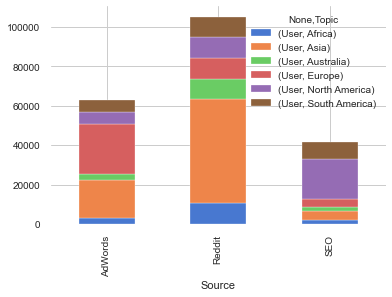

In [22]:
plt.figure(figsize=(20,5))
sns.set_palette('muted')
topic_source_pivot.plot(kind='bar', stacked=True)

6. Relationship between topic and country


In [23]:
topic_country_pivot = first.groupby(['Country', 'Topic'])\
                    .User.count()\
                    .reset_index()\
                    .pivot(index='Country', columns='Topic')
topic_country_pivot

User                                                    
Topic     Africa   Asia Australia Europe North America South America
Country                                                             
country_1    383   1800       377   1021           886           609
country_2   3789  18481      3834   9452          9050          6069
country_3    226    979       202    500           509           326
country_4    953   4638       999   2374          2283          1504
country_5   3040  14597      3002   7603          7311          4796
country_6   2432  11283      2344   5884          5578          3635
country_7   3919  18743      3946   9776          9135          6272
country_8   1171   5571      1091   2951          2815          1884

<Figure size 1440x360 with 0 Axes>

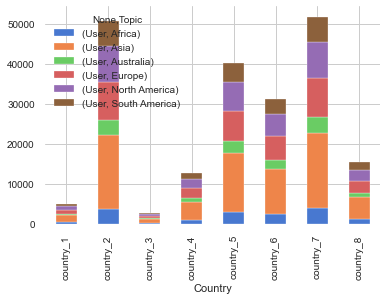

In [24]:
plt.figure(figsize=(20,5))
sns.set_palette('muted')
topic_country_pivot.plot(kind='bar', stacked=True)

# Return

1. Total return visitor per topic

In [25]:
returning = df[(df.Source == 'return') & (df.Event == 'read')]

In [26]:
r_topic = returning.Topic.value_counts()
r_topic

Asia             118833
North America     92767
Europe            54136
South America     51706
Africa            27481
Australia         26931
Name: Topic, dtype: int64

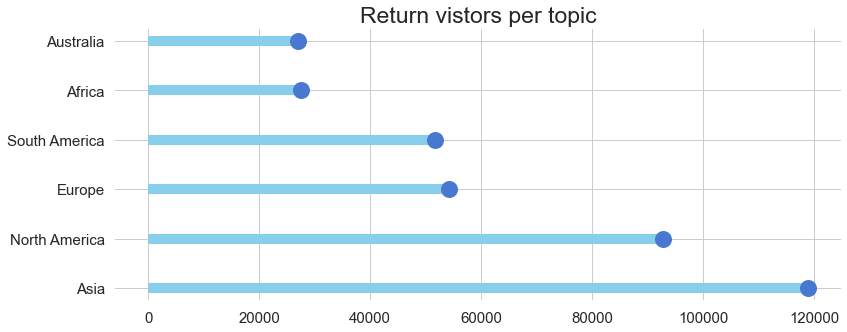

In [27]:
ax = plt.figure(figsize=(13,5))
plt.hlines(y=r_topic.index, xmin=0, xmax=r_topic.values, color='skyblue', linewidth=10)
plt.plot(r_topic.values, r_topic.index, "o", markersize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Return vistors per topic', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

2. Total return visitor per country

In [28]:
r_country = returning.Country.value_counts()
r_country

country_5    109383
country_7     80276
country_2     79401
country_4     58507
country_6     32596
country_3      6386
country_8      4150
country_1      1155
Name: Country, dtype: int64

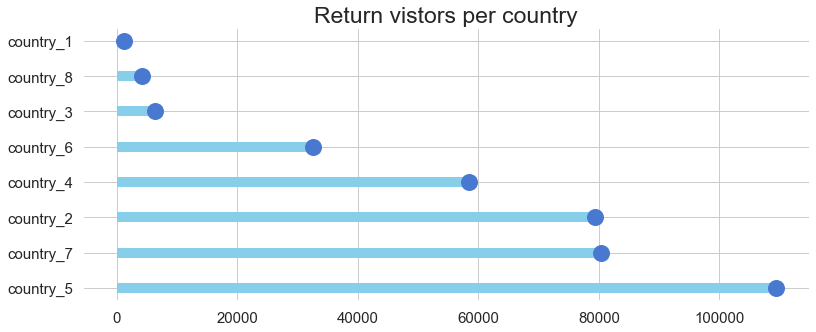

In [29]:
ax = plt.figure(figsize=(13,5))
plt.hlines(y=r_country.index, xmin=0, xmax=r_country.values, color='skyblue', linewidth=10)
plt.plot(r_country.values, r_country.index, "o", markersize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Return vistors per country', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

3. If their return country same with their first topic

In [30]:
reader = first.append(returning)

In [31]:
group = reader.sort_values(by=['User', 'Date'])[['User', 'Topic']]

In [32]:
user_list = group.User.to_list()
topic_list = group.Topic.to_list()

In [33]:
data = {}
for i in range(len(user_list)):
    if user_list[i] not in data:
        data[user_list[i]] = []
        data[user_list[i]].append(topic_list[i])
    elif user_list[i] in data:
        data[user_list[i]].append(topic_list[i])
    
    else:
        print('error')

In [34]:
return_dict = {}
for key in data.keys():
    if len(data[key]) != 1:
        return_dict[key] = []
        return_dict[key].extend(data[key])

In [35]:
return_list = list(return_dict.values())

In [36]:
average_read = 0
for element in return_list: 
    average_read += len(element)
average_read /= len(return_list)

In [37]:
average_read

6.614500762482825

In [38]:
average_first = 0
for element in return_list:
    average_first += element.count(element[0])
average_first /= len(return_list)

In [39]:
average_first

2.837961075629237

In [40]:
average_unique = 0
for element in return_list:
    average_unique += len(set(element))
average_unique /= len(return_list)

In [41]:
average_unique

3.1682897736709394

In [42]:
average_read_list = [len(element) for element in return_list]
average_first_list = [element.count(element[0]) for element in return_list]
average_unique_list = [len(set(element)) for element in return_list]

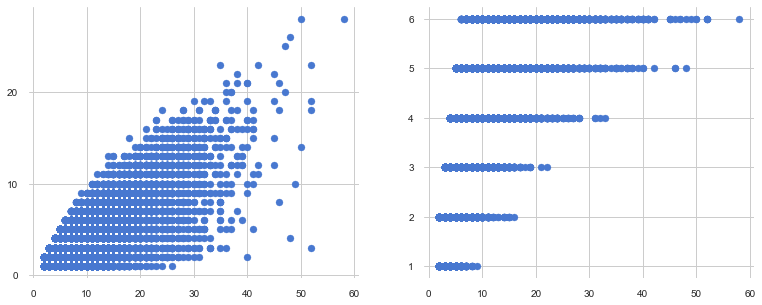

In [43]:
ax = plt.figure(figsize=(13,5))
ax =plt.subplot(1,2,1)
plt.scatter(average_read_list, average_first_list)
ax.set_yticks(list(range(0,25,10)))
plt.subplot(1,2,2)
plt.scatter(average_read_list, average_unique_list)

In [44]:
from scipy.stats.stats import pearsonr      
print(pearsonr(average_read_list,average_first_list))
print(pearsonr(average_read_list,average_unique_list))

(0.7755981484136277, 0.0)
(0.7647765917666439, 0.0)


In [45]:
repeat = 0
for element in return_list:
    if element[1] == element[0]:
        repeat += 1
repeat /= len(return_list)
repeat *= 100
repeat

33.02230073530522

4. Total return visitor per day, per hour

In [46]:
returning.loc[:, 'Month'] = returning['Date'].dt.month

/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


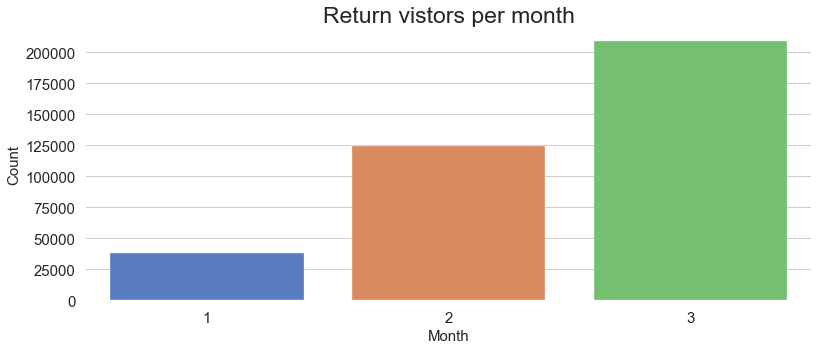

In [47]:
ax = plt.figure(figsize=(13,5))
sns.countplot(data=returning, x='Month')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Return vistors per month', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

In [48]:
returning.loc[:, 'Hour'] = returning['Date'].dt.hour

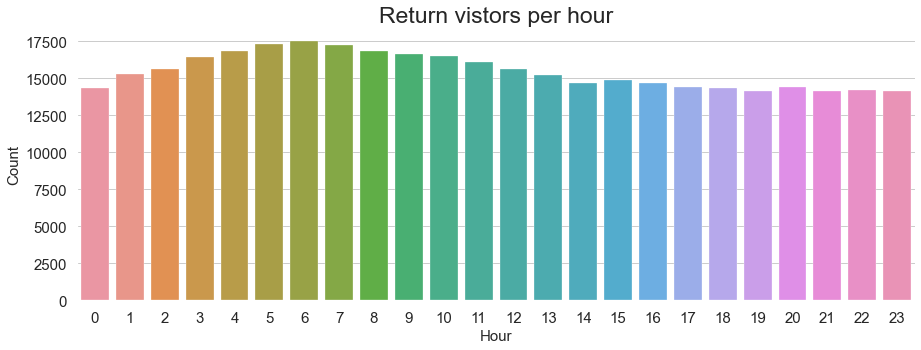

In [49]:
ax = plt.figure(figsize=(15,5))
sns.countplot(data=returning, x='Hour')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Return vistors per hour', fontsize=23)
sns.set_style('whitegrid')
sns.despine()

# Funnel analysis

In [50]:
funnel = df.sort_values(by=['User', 'Date'])[['User', 'Source', 'Event']]
funnel_user = funnel.User.to_list()
funnel_source = funnel.Source.to_list()
funnel_event = funnel.Event.to_list()

In [51]:
funnel_dict= {}
for i in range(len(funnel_user)):
    if funnel_user[i] not in funnel_dict:
        funnel_dict[funnel_user[i]] = []
        
        if (funnel_event[i] == 'read'):
            funnel_dict[funnel_user[i]].append(funnel_source[i])
        
        elif (funnel_event[i] == 'subscribe') | (funnel_event[i] == 'buy'):
            funnel_dict[funnel_user[i]].append(funnel_event[i])
        
        else:
            print('error')
            
    elif funnel_user[i] in funnel_dict:
        if (funnel_event[i] == 'read'):
            funnel_dict[funnel_user[i]].append(funnel_source[i])
        
        elif (funnel_event[i] == 'subscribe') | (funnel_event[i] == 'buy'):
            funnel_dict[funnel_user[i]].append(funnel_event[i])
        
        else:
            print('error')
        

In [52]:
first_number = len(funnel_dict.keys())
first_number

210023

In [53]:
return_number = 0
for element in funnel_dict.values():
    if 'return' in element:
        return_number += 1
return_number

66231

In [54]:
subscribe_number = 0
for element in funnel_dict.values():
    if 'subscribe' in element:
        subscribe_number += 1
subscribe_number

7618

In [55]:
buy_number = 0
for element in funnel_dict.values():
    if 'buy' in element:
        buy_number += 1
buy_number

6611

In [56]:
funnel_list = [first_number, return_number, subscribe_number, buy_number ]

[Text(0, 0, 'First'),
 Text(0, 0, 'Return'),
 Text(0, 0, 'Subscribe'),
 Text(0, 0, 'Buy')]

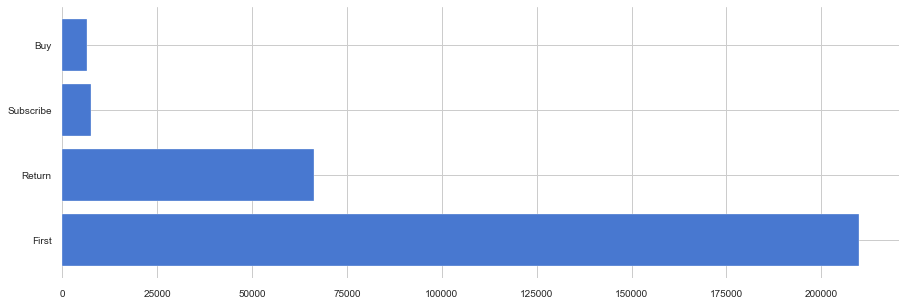

In [57]:
plt.figure(figsize=(15,5))
ax = plt.subplot()
plt.barh(range(len(funnel_list)), funnel_list)
ax.set_yticks(list(range(0,4)))
ax.set_yticklabels(['First', 'Return', 'Subscribe', 'Buy'])

2. How many visit before subscribe 

In [58]:
visit_list = []
for element in funnel_dict.values():
    if 'subscribe' in element:
        visit_list.append(element[0:element.index('subscribe')].count('return'))

{'bodies': [<matplotlib.collections.PolyCollection at 0x13287be90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x13287bd10>,
 'cmins': <matplotlib.collections.LineCollection at 0x13287bdd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x13a27ee90>}

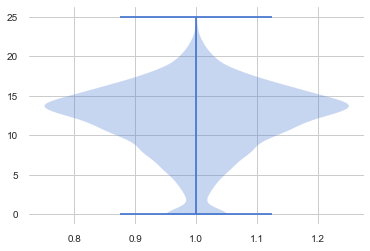

In [59]:
plt.violinplot(visit_list)

{'whiskers': [<matplotlib.lines.Line2D at 0x1328eb2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1328ebd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1328e5d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1328f3850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1328f3d90>],
 'means': []}

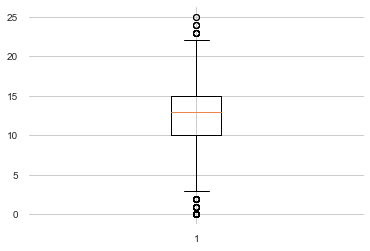

In [60]:
plt.boxplot(visit_list)

# Revenue

1. Revenue per month 

In [61]:
buy = df[df.Event == 'buy']

In [62]:
buy.loc[:, 'Month'] = buy.Date.dt.month

/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/IP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
buy['Type'] = buy.Price.apply(lambda x: 'L' if x == 80 else 'S')

/Users/IP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
rev_month_pivot = buy.groupby(['Month', 'Type']).Price.sum().reset_index().pivot(index='Month', columns='Type')
rev_month_pivot

Price       
Type       L      S
Month              
1      17280   5856
2      46400  15872
3      76640  31096

<Figure size 1440x360 with 0 Axes>

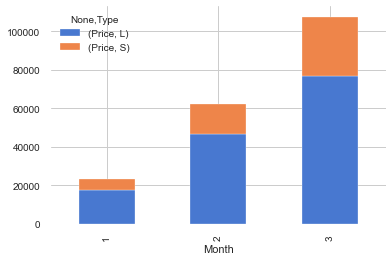

In [65]:
plt.figure(figsize=(20,5))
sns.set_palette('muted')
rev_month_pivot.plot(kind='bar', stacked=True)

In [66]:
tran_month_pivot = buy.groupby(['Month', 'Type']).User.count().reset_index().pivot(index='Month', columns='Type')
tran_month_pivot

User      
Type     L     S
Month           
1      216   732
2      580  1984
3      958  3887

<Figure size 1440x360 with 0 Axes>

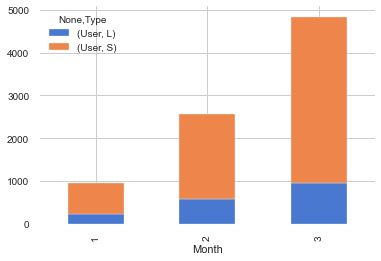

In [67]:
plt.figure(figsize=(20,5))
sns.set_palette('muted')
tran_month_pivot.plot(kind='bar', stacked=True)

How many day between subscribe and make the first payment

In [68]:
first_payment = df.sort_values(by=['User', 'Date'])[['User', 'Date', 'Event']]

In [69]:
first_payment = first_payment[first_payment['Event'] != 'read']

In [70]:
first_payment[first_payment.User == 2458320929]

,User,Date,Event
597518,2458320929,2018-03-28 05:50:55,buy


In [71]:
first_payment_user = first_payment.User.to_list()
first_payment_date = first_payment.Date.to_list()
first_payment_event = first_payment.Event.to_list()

In [72]:
first_payment_user.count(2458320929)

1

In [73]:
len(first_payment_user)

15975

In [74]:
first_user = []
first_date = []
first_event = []
for i in range(len(first_payment_user)):
    if not (first_payment_user.count(first_payment_user[i]) == 1):
        first_user.append(first_payment_user[i])
        first_date.append(first_payment_date[i])
        first_event.append(first_payment_event[i])

In [75]:
len(first_user), len(first_date), len(first_event)

(11909, 11909, 11909)

In [76]:
uni_user = []
for user in first_user:
    if user not in uni_user:
        uni_user.append(user)
            

In [77]:
first_dict = {}
for user in uni_user:
    first_dict[user] = {'subscribe':'', 'buy':[]}

In [78]:
for user in first_dict.keys():
    entry = first_user.count(user)
    start = first_user.index(user)
    for i in range(0, entry):
        if first_event[start+i] == 'subscribe':
            first_dict[user]['subscribe'] = (str(first_date[start+i]))
            
        elif first_event[start+i] == 'buy':
            first_dict[user]['buy'].append(str(first_date[start+i]))
        

In [79]:
first_dict

{2458151279: {'subscribe': '2018-01-04 01:53:26',
  'buy': ['2018-01-04 00:50:27', '2018-01-05 10:23:05']},
 2458151323: {'subscribe': '2018-01-10 10:53:02',
  'buy': ['2018-01-10 02:09:21']},
 2458151349: {'subscribe': '2018-02-24 07:07:16',
  'buy': ['2018-02-24 18:22:05']},
 2458151364: {'subscribe': '2018-01-22 18:18:00',
  'buy': ['2018-01-22 08:09:06']},
 2458151367: {'subscribe': '2018-01-26 23:29:37',
  'buy': ['2018-01-26 09:02:07']},
 2458151425: {'subscribe': '2018-02-27 15:25:22',
  'buy': ['2018-02-25 22:19:50']},
 2458151468: {'subscribe': '2018-01-01 02:56:58',
  'buy': ['2018-01-02 18:09:20', '2018-01-02 19:08:12']},
 2458151481: {'subscribe': '2018-01-02 02:33:52',
  'buy': ['2018-01-02 03:48:38', '2018-01-03 01:33:30']},
 2458151498: {'subscribe': '2018-01-31 07:26:14',
  'buy': ['2018-02-01 10:47:03']},
 2458151500: {'subscribe': '2018-01-04 04:53:56',
  'buy': ['2018-01-04 10:43:38']},
 2458151525: {'subscribe': '2018-01-02 12:43:58',
  'buy': ['2018-01-02 07:57:24'

In [80]:
for user in first_dict.keys():
    first_dict[user]['buy'] = first_dict[user]['buy'][0]

In [81]:
first_dict

{2458151279: {'subscribe': '2018-01-04 01:53:26',
  'buy': '2018-01-04 00:50:27'},
 2458151323: {'subscribe': '2018-01-10 10:53:02',
  'buy': '2018-01-10 02:09:21'},
 2458151349: {'subscribe': '2018-02-24 07:07:16',
  'buy': '2018-02-24 18:22:05'},
 2458151364: {'subscribe': '2018-01-22 18:18:00',
  'buy': '2018-01-22 08:09:06'},
 2458151367: {'subscribe': '2018-01-26 23:29:37',
  'buy': '2018-01-26 09:02:07'},
 2458151425: {'subscribe': '2018-02-27 15:25:22',
  'buy': '2018-02-25 22:19:50'},
 2458151468: {'subscribe': '2018-01-01 02:56:58',
  'buy': '2018-01-02 18:09:20'},
 2458151481: {'subscribe': '2018-01-02 02:33:52',
  'buy': '2018-01-02 03:48:38'},
 2458151498: {'subscribe': '2018-01-31 07:26:14',
  'buy': '2018-02-01 10:47:03'},
 2458151500: {'subscribe': '2018-01-04 04:53:56',
  'buy': '2018-01-04 10:43:38'},
 2458151525: {'subscribe': '2018-01-02 12:43:58',
  'buy': '2018-01-02 07:57:24'},
 2458151555: {'subscribe': '2018-01-01 03:58:02',
  'buy': '2018-01-01 04:04:59'},
 245

In [82]:
final_user = list(first_dict.keys())

In [83]:
final_subscribe = []
for date in first_dict.values():
    final_subscribe.append(date['subscribe'])
    


In [84]:
final_subscribe

['2018-01-04 01:53:26',
 '2018-01-10 10:53:02',
 '2018-02-24 07:07:16',
 '2018-01-22 18:18:00',
 '2018-01-26 23:29:37',
 '2018-02-27 15:25:22',
 '2018-01-01 02:56:58',
 '2018-01-02 02:33:52',
 '2018-01-31 07:26:14',
 '2018-01-04 04:53:56',
 '2018-01-02 12:43:58',
 '2018-01-01 03:58:02',
 '2018-02-28 13:41:37',
 '2018-01-01 04:29:07',
 '2018-01-07 22:09:16',
 '2018-02-24 02:25:24',
 '2018-03-21 21:28:07',
 '2018-01-02 15:47:49',
 '2018-01-02 15:58:08',
 '2018-03-02 09:04:18',
 '2018-01-03 16:35:49',
 '2018-02-26 07:16:23',
 '2018-03-24 10:06:43',
 '2018-03-06 15:16:54',
 '2018-01-11 17:25:41',
 '2018-01-24 16:09:02',
 '2018-01-20 20:10:36',
 '2018-01-04 03:45:12',
 '2018-01-02 21:25:27',
 '2018-01-01 09:18:08',
 '2018-01-12 12:32:43',
 '2018-01-27 14:04:55',
 '2018-01-01 09:40:18',
 '2018-02-12 03:01:15',
 '2018-03-16 00:48:31',
 '2018-02-14 08:27:31',
 '2018-02-11 02:02:14',
 '2018-02-16 05:11:37',
 '2018-02-28 09:02:47',
 '2018-03-15 13:20:32',
 '2018-01-02 08:44:00',
 '2018-02-25 21:

In [85]:
final_buy = []
for date in first_dict.values():
    final_buy.append(date['buy'])
    

In [86]:
df_sb = pd.DataFrame(zip(final_user, final_subscribe, final_buy), columns=['User', 'Subscribe', 'Buy'])

In [87]:
df_sb

,User,Subscribe,Buy
0,2458151279,2018-01-04 01:53:26,2018-01-04 00:50:27
1,2458151323,2018-01-10 10:53:02,2018-01-10 02:09:21
2,2458151349,2018-02-24 07:07:16,2018-02-24 18:22:05
3,2458151364,2018-01-22 18:18:00,2018-01-22 08:09:06
4,2458151367,2018-01-26 23:29:37,2018-01-26 09:02:07
...,...,...,...
5085,2458342651,2018-03-30 15:59:23,2018-03-29 11:54:44
5086,2458342659,2018-03-30 12:51:35,2018-03-29 14:04:16
5087,2458343139,2018-03-30 00:26:10,2018-03-27 23:51:10
5088,2458343185,2018-03-30 01:27:20,2018-03-28 16:48:40


In [88]:
df_sb['Subscribe'] = pd.to_datetime(df_sb['Subscribe'], format="%Y-%m-%d %H:%M:%S")
df_sb['Buy'] = pd.to_datetime(df_sb['Buy'], format="%Y-%m-%d %H:%M:%S")

In [89]:
len(df_sb)

5090

In [90]:
df_sb.dropna(inplace=True)

In [91]:
df_sb['Difference'] = df_sb.Buy - df_sb.Subscribe

In [92]:
df_sb['Difference'] = df_sb['Difference'].dt.days

In [93]:
df_sb.sample(10)

,User,Subscribe,Buy,Difference
2826,2458246284,2018-02-22 10:53:06,2018-02-22 03:37:10,-1
793,2458173531,2018-03-28 01:00:05,2018-03-26 05:01:51,-2
1330,2458191273,2018-01-28 14:13:15,2018-01-28 17:02:06,0
383,2458161506,2018-02-08 07:52:12,2018-02-06 00:30:45,-3
3937,2458289273,2018-03-13 08:40:47,2018-03-10 02:17:27,-4
1631,2458202321,2018-01-30 01:48:00,2018-01-30 08:00:10,0
3269,2458262781,2018-02-28 16:14:18,2018-02-27 15:06:16,-2
3777,2458282770,2018-03-11 18:42:13,2018-03-06 13:36:03,-6
4240,2458301952,2018-03-19 22:31:57,2018-03-16 07:34:11,-4
4024,2458292635,2018-03-17 17:44:16,2018-03-13 00:02:12,-5


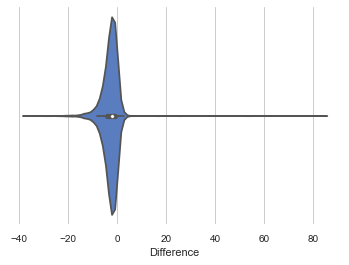

In [94]:
sns.violinplot(x=df_sb["Difference"])